# Assn 5 Task 2 Prepare and Explore the Data

# Import Libraries

In [1000]:
import pandas as pd

In [1001]:
import matplotlib.pyplot as plt

In [1002]:
import numpy as np

In [1003]:
import os

In [1004]:
import seaborn as sns

In [1005]:
from sklearn.model_selection import train_test_split  

In [1006]:
from sklearn.feature_selection import VarianceThreshold

In [1007]:
from pandas.plotting import scatter_matrix

In [1008]:
from pandas import Series, DataFrame

In [1009]:
import dill

In [1010]:
from pandas import HDFStore

# Store variables

In [806]:
# This section is under development

In [1013]:
dill.dump_session('/Users/celestehofer/anaconda3/share/jupyter/backupAssn5dill5-31.db')

In [ ]:
#backup = pd.HDFStore('/Users/celestehofer/anaconda3/share/jupyter/backupASS5.h5')

# Read Data Set using Pandas

In [ ]:
# Determine current working directory
pwd = os.getcwd()
print(pwd)

In [1014]:
# Change the directory where our file is
pwd = os.chdir('/Users/celestehofer/Desktop/Austin_DS_Program/Assn5_Task2')
print(os.getcwd())

/Users/celestehofer/Desktop/Austin_DS_Program/Assn5_Task2


In [1015]:
# read data set using pandas
credit = pd.read_csv('default of credit card clients.csv', header =1)

# Analyze and Evaluate Data

In [1016]:
# Get first five rows of data
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [1017]:
credit.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [1018]:
# Provides statistics about each variable
# similar to R summary()
# info returned shows whether the values are integers or real numbers
# Some of the data is nominal, but that is not readily noted without u
# reading DataSourceUpdate5.18.pdf
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [1019]:
# to find data types
credit.info

<bound method DataFrame.info of           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
5          6      50000    1          1         2   37      0      0      0   
6          7     500000    1          1         2   29      0      0      0   
7          8     100000    2          2         2   23      0     -1     -1   
8          9     140000    2          3         1   28      0      0      2   
9         10      20000    1          3         2   35     -2     -2     -2   
10        11     200000    2          3         2   34      0      0      2   
11        12     260

In [1020]:
# get col names
column_names = credit.columns
print(column_names)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [1021]:
# get column data types
dattypes = credit.dtypes
print(dattypes)

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


In [1022]:
# is column name unique
for i in column_names:
  print('{} is unique: {}'.format(i, credit[i].is_unique))

ID is unique: True
LIMIT_BAL is unique: False
SEX is unique: False
EDUCATION is unique: False
MARRIAGE is unique: False
AGE is unique: False
PAY_0 is unique: False
PAY_2 is unique: False
PAY_3 is unique: False
PAY_4 is unique: False
PAY_5 is unique: False
PAY_6 is unique: False
BILL_AMT1 is unique: False
BILL_AMT2 is unique: False
BILL_AMT3 is unique: False
BILL_AMT4 is unique: False
BILL_AMT5 is unique: False
BILL_AMT6 is unique: False
PAY_AMT1 is unique: False
PAY_AMT2 is unique: False
PAY_AMT3 is unique: False
PAY_AMT4 is unique: False
PAY_AMT5 is unique: False
PAY_AMT6 is unique: False
default payment next month is unique: False


In [1023]:
# gives us the # of rows and columns
credit.shape

(30000, 25)

# Exploratory Data Analysis Modeled after Titanic Data Set Analysis

In [1024]:
# get the number of people of each sex
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

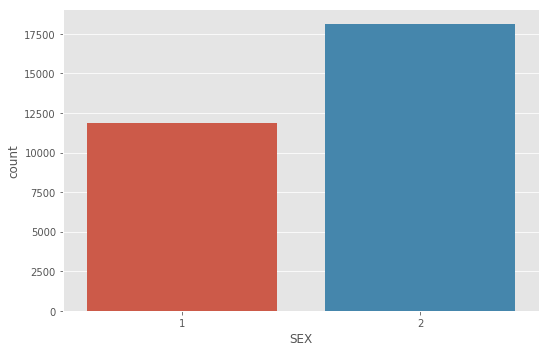

In [1025]:
# Instead of a group by, use seaborn to plot the number of males and females
sns.catplot('SEX', data=credit, kind='count', aspect=1.5)

# Error message received when factorplot was used:
# /Users/celestehofer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: 
# The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. 
# Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` 
# in `catplot`.

In [1026]:
# get the number of people of each sex
# GRAPH ALTERNATIVE BELOW UNDER SEABORN BAR GRAPHS
credit.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

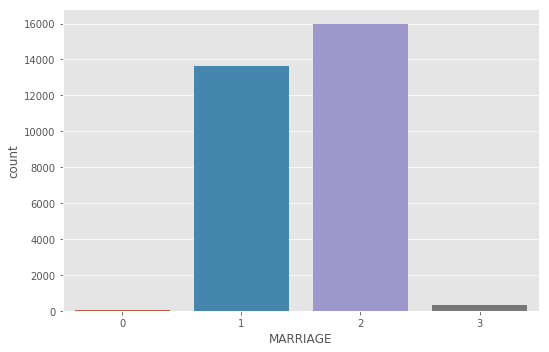

In [1027]:
# Instead of a group by, use seaborn to plot the count of passengers in each class
fg = sns.catplot('MARRIAGE', data=credit,  kind='count', aspect=1.5)
fg.set_xlabels('MARRIAGE')

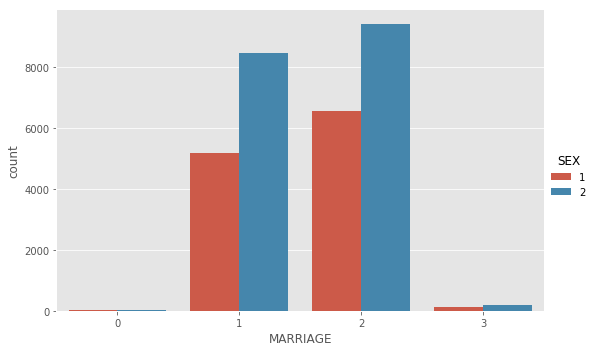

In [1028]:
# Instead of a group by, use seaborn to plot the count of passengers in each class
fg = sns.catplot('MARRIAGE', data=credit, hue='SEX',kind='count', aspect=1.5)
fg.set_xlabels('MARRIAGE')

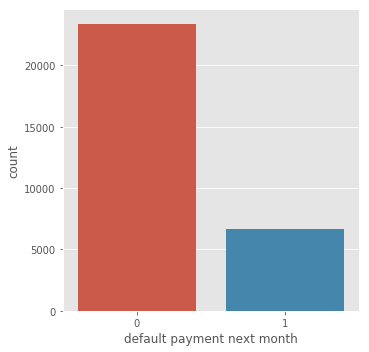

In [1029]:
sns.catplot('default payment next month',data=credit, kind='count')

In [1030]:
# In the graph above, 0 = no default , 1 = default

In [1031]:
# Number of men and women in each of the education groups
credit.groupby(['SEX', 'EDUCATION'])['SEX'].count()

SEX  EDUCATION
1    0               8
     1            4354
     2            5374
     3            1990
     4              42
     5              95
     6              25
2    0               6
     1            6231
     2            8656
     3            2927
     4              81
     5             185
     6              26
Name: SEX, dtype: int64

In [1032]:
# Info for customers on default payment  status  grouped by Sex. Also total was found for each educational status grouped by sex.
credit.pivot_table('default payment next month', 'SEX', 'EDUCATION', aggfunc=np.sum, margins=True)

EDUCATION,0,1,2,3,4,5,6,All
SEX,,,,,,,,
1,0,906,1408,545,4,6,4,2873
2,0,1130,1922,692,3,12,4,3763
All,0,2036,3330,1237,7,18,8,6636


In [1034]:
# how many people defaulted?  Value of 1 for default, 0 for no default
# See Seaborn graph below
defaulted = credit[credit['default payment next month']==1]
not_defaulted = credit[credit['default payment next month']==0]
defNum = len(defaulted)
paidNum = len(not_defaulted)
print("The number of people who defaulted is: ", (defNum), " and the number of people who did not default is: ", paidNum)

The number of people who defaulted is:  6636  and the number of people who did not default is:  23364


In [1035]:
# Number of customers who did not default in each education type grouped by sex.
not_defaulted.pivot_table('default payment next month', 'SEX', 'EDUCATION', aggfunc=len, margins=True)

EDUCATION,0,1,2,3,4,5,6,All
SEX,,,,,,,,
1,8,3448,3966,1445,38,89,21,9015
2,6,5101,6734,2235,78,173,22,14349
All,14,8549,10700,3680,116,262,43,23364


In [1037]:
# Number of customers who did  default in each education type grouped by sex.
defaulted.pivot_table('default payment next month', 'SEX', 'EDUCATION', aggfunc=len, margins=True)

EDUCATION,1,2,3,4,5,6,All
SEX,,,,,,,
1,906,1408,545,4,6,4,2873
2,1130,1922,692,3,12,4,3763
All,2036,3330,1237,7,18,8,6636


In [1038]:

# Customers who defaulted grouped by sex and marriage
table = pd.crosstab(index=[defNum,paidNum], columns=[credit.SEX,credit.MARRIAGE])
table.unstack()

SEX          1                       2                  
MARRIAGE     0     1     2     3     0     1     2     3
row_1    23364 23364 23364 23364 23364 23364 23364 23364
row_0                                                   
6636        14  5190  6553   131    40  8469  9411   192

In [1039]:
table.columns, table.index

(MultiIndex(levels=[[1, 2], [0, 1, 2, 3]],
            codes=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 2, 3, 0, 1, 2, 3]],
            names=['SEX', 'MARRIAGE']), MultiIndex(levels=[[6636], [23364]],
            codes=[[0], [0]],
            names=['row_0', 'row_1']))

In [1040]:
# Change names of columns

table.columns.set_levels(['Male', 'Female'], level=0, inplace=True)
table.columns.set_levels(['married','single','divorce','other'], level=1, inplace=True)
table

SEX            Male                       Female                     
MARRIAGE    married single divorce other married single divorce other
row_0 row_1                                                          
6636  23364      14   5190    6553   131      40   8469    9411   192

Text(0.5, 1.0, "Distribution of Customers' Ages")

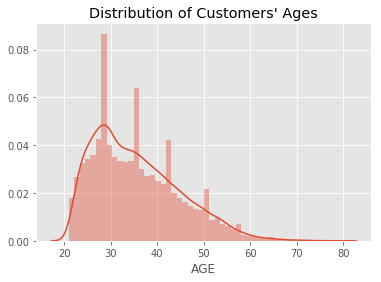

In [1041]:
# Distribution of age, with an overlay of a density plot
age = credit['AGE']
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Customers' Ages")

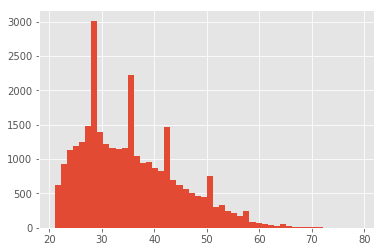

In [1042]:
# Another way to plot a histogram of ages is shown below
credit['AGE'].hist(bins=50)

In [1043]:
# bin age into 3 groups
age_bin = pd.cut(np.array(credit['AGE']),3, labels=["young_adult", "adult", "older_adult"])
print(age_bin.value_counts())

young_adult    21726
adult           7935
older_adult      339
dtype: int64


In [1044]:
# look at types of these variables
credit['MARRIAGE'].dtype, credit['EDUCATION'].dtype, len(credit.AGE)

(dtype('int64'), dtype('int64'), 30000)

In [1055]:
# Create data frame containing new columns
creditExtraCols = credit
creditExtraCols

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,age_group
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,under_thirty
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,under_thirty
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,thirty_and_over
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,thirty_and_over
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,thirty_and_over
5,6,50000,1,1,2,37,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,thirty_and_over
6,7,500000,1,1,2,29,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,under_thirty
7,8,100000,2,2,2,23,0,-1,-1,0,...,-159,567,380,601,0,581,1687,1542,0,under_thirty
8,9,140000,2,3,1,28,0,0,2,0,...,11793,3719,3329,0,432,1000,1000,1000,0,under_thirty
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,13007,13912,0,0,0,13007,1122,0,0,thirty_and_over


In [1056]:
# Create a function to define those who are under thirty and those who are thirty and over
def male_female_LessThanThirty(customer):
    AGE, SEX  = customer

    if AGE < 30:
        return 'under_thirty'
    else:
        return 'thirty_and_over'





In [1060]:
# add column based on under thirty or thirty and over
creditExtraCols['age_group'] = creditExtraCols[['AGE', 'SEX']].apply(male_female_LessThanThirty, axis=1)
# Lets have a look at the first 10 rows of the data frame
creditExtraCols[:10]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,age_group
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,under_thirty
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,under_thirty
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,thirty_and_over
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,thirty_and_over
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,thirty_and_over
5,6,50000,1,1,2,37,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,0,thirty_and_over
6,7,500000,1,1,2,29,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,0,under_thirty
7,8,100000,2,2,2,23,0,-1,-1,0,...,-159,567,380,601,0,581,1687,1542,0,under_thirty
8,9,140000,2,3,1,28,0,0,2,0,...,11793,3719,3329,0,432,1000,1000,1000,0,under_thirty
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,13007,13912,0,0,0,13007,1122,0,0,thirty_and_over


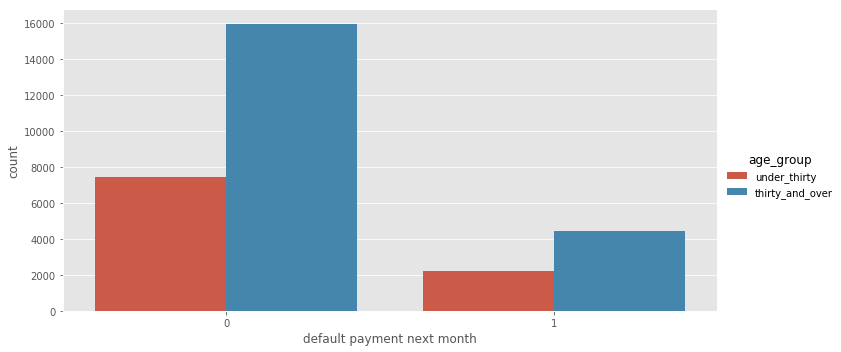

In [1076]:
#Lets do a catplot of customers splitted into payment default and age under or over thirty
sns.catplot('default payment next month', data=creditExtraCols, kind='count', hue='age_group', order=[0,1], 
               hue_order=['under_thirty','thirty_and_over'], aspect=2)

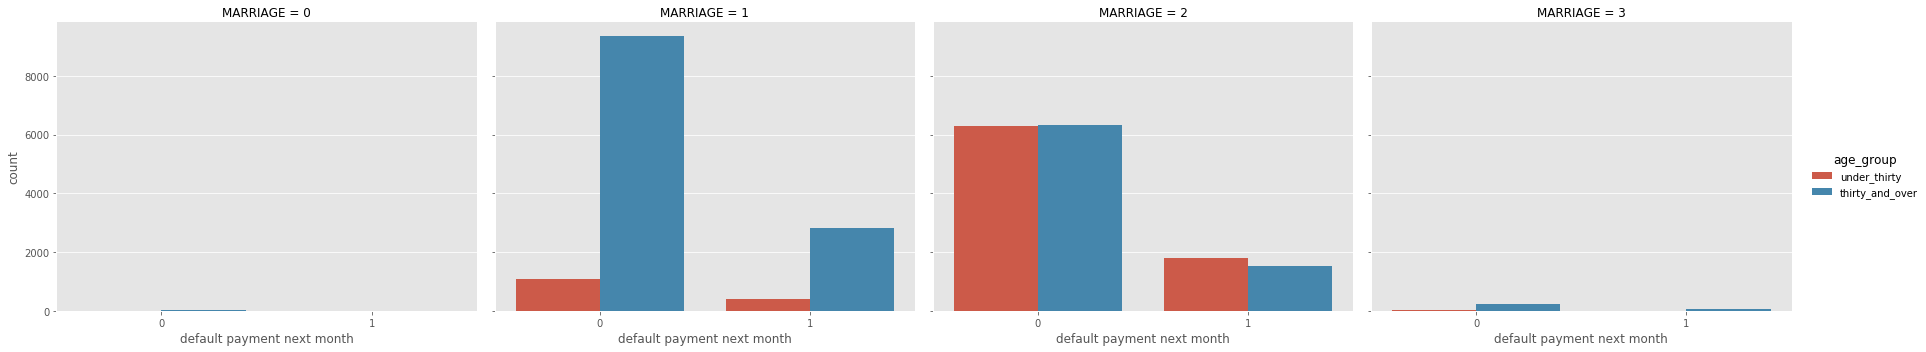

In [1078]:
# Do the same as above, but divide the customers by marital status
# 0 is no default 1 is default
sns.catplot('default payment next month', data=creditExtraCols, kind='count', hue='age_group',col='MARRIAGE', order=[0,1], 
               hue_order=['under_thirty','thirty_and_over'], aspect=1.25, height=5)

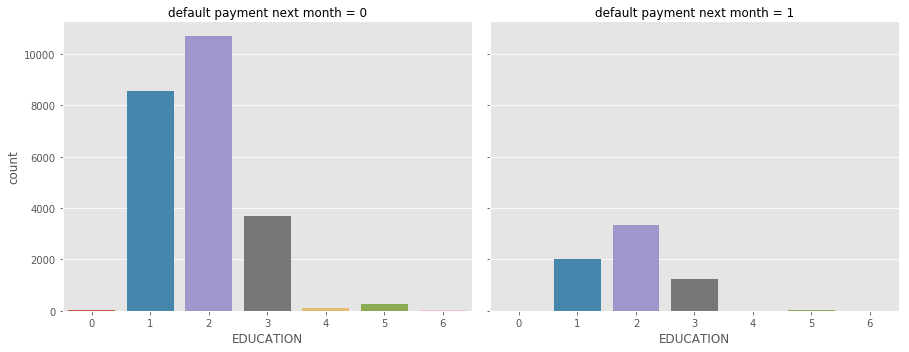

In [1079]:

# Do the same as above, but divide the customers by educational status
sns.catplot('EDUCATION', data=credit, kind='count', col='default payment next month', order=[0,1,2,3,4,5,6], 
               hue_order=['1','2'],  aspect=1.25, height=5)

## kde plot, Distribution of Customers' Ages

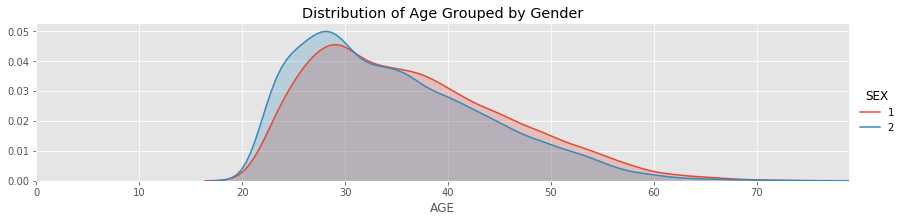

In [1080]:
# Grouped by Gender
fig = sns.FacetGrid(credit, hue='SEX', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Gender')
fig.add_legend()

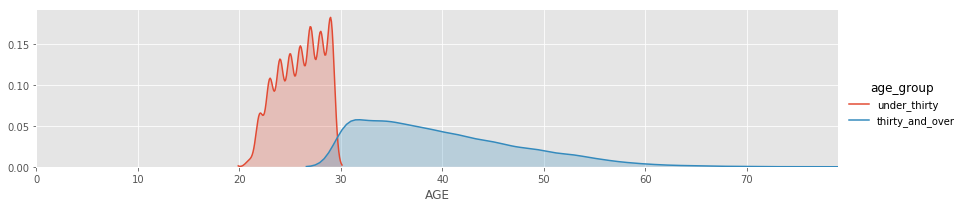

In [1081]:
fig = sns.FacetGrid(creditExtraCols, hue='age_group', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

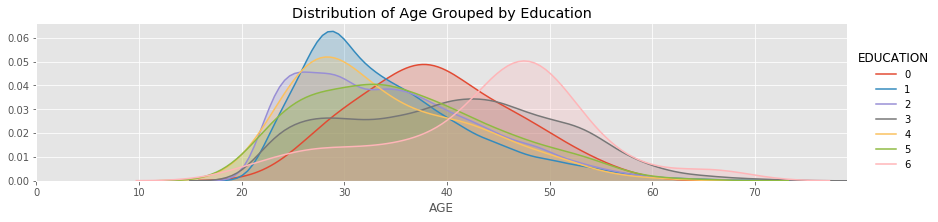

In [1082]:
# Grouped by Education
fig = sns.FacetGrid(credit, hue='EDUCATION', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = credit['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Education')
fig.add_legend()

In [ ]:
# Some of the education levels per age are wkewed left, some skewed right, others have a normal distribution

In [1083]:
# What are the ages of the customers?
# Not doing a dropNa() as analysis shows no NAs in this data
ageVal = credit['AGE']
ageVal.head()

0    24
1    26
2    34
3    37
4    57
Name: AGE, dtype: int64

In [1084]:
# Grab the first int value of age and add it to a list
d = []
for c in ageVal:
    #print("hi")
    d.append(int(c))
d[0:10]

[24, 26, 34, 37, 57, 37, 29, 23, 28, 35]

In [1085]:
# Count the number of values for each age
from collections import Counter
Counter(d)

Counter({24: 1127,
         26: 1256,
         34: 1162,
         37: 1041,
         57: 122,
         29: 1605,
         23: 931,
         28: 1409,
         35: 1113,
         51: 340,
         41: 824,
         30: 1395,
         49: 452,
         39: 954,
         40: 870,
         27: 1477,
         47: 501,
         33: 1146,
         32: 1158,
         54: 247,
         58: 122,
         22: 560,
         25: 1186,
         31: 1217,
         46: 570,
         42: 794,
         43: 670,
         45: 617,
         56: 178,
         44: 700,
         53: 325,
         38: 944,
         63: 31,
         36: 1108,
         52: 304,
         48: 466,
         55: 209,
         60: 67,
         50: 411,
         75: 3,
         61: 56,
         73: 4,
         59: 83,
         21: 67,
         67: 16,
         66: 25,
         62: 44,
         70: 10,
         72: 3,
         64: 31,
         65: 24,
         71: 3,
         69: 15,
         68: 5,
         79: 1,
         74: 1})

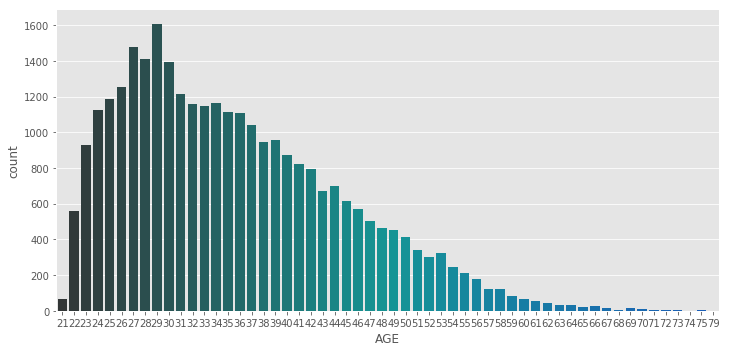

In [1086]:
# Now lets catplot the ages. First transfer the d list into a data frame.  
age_df = DataFrame(d)
age_df.columns=['AGE']
sns.catplot('AGE', data=age_df, kind='count', order=age_df.sort_values("AGE", axis = 0, inplace = True), aspect=2, 
    
            palette='winter_d')


In [1087]:
# Drop the ages greater than  to 50
age_df = age_df[age_df['AGE'] <= 50]

/Users/celestehofer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


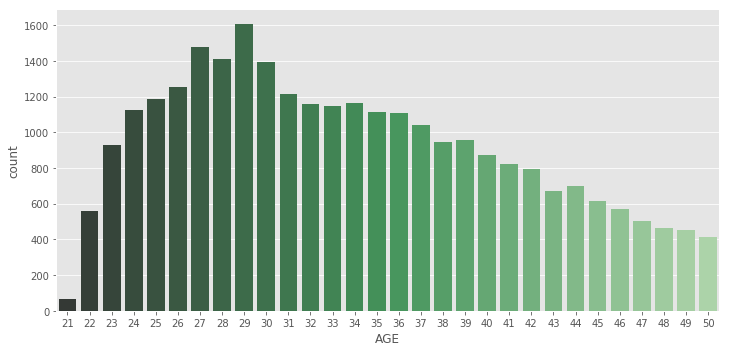

In [1088]:
#  Then replot the Cabins catplot as above
sns.catplot('AGE', data=age_df, kind='count', order=age_df.sort_values("AGE", axis = 0, inplace = True), aspect=2, 
              palette='Greens_d')

In [853]:
# Below is a link to the list of matplotlib colormaps
url = 'http://matplotlib.org/api/pyplot_summary.html?highlight=colormaps#matplotlib.pyplot.colormaps'
import webbrowser
webbrowser.open(url)


True

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

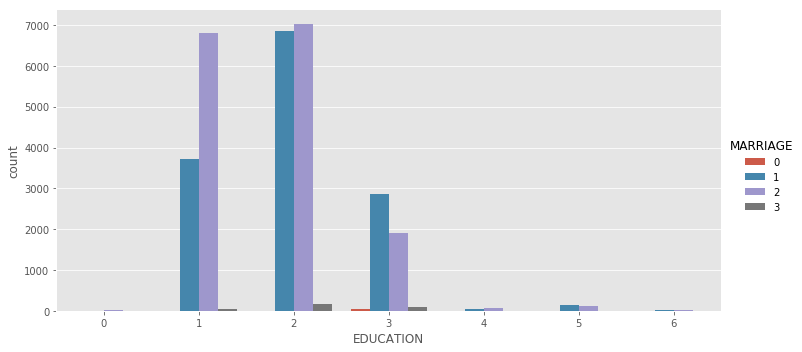

In [1089]:
# What is the marital status for various education levels
sns.catplot('EDUCATION', data=credit, kind='count', hue='MARRIAGE', hue_order=range(0,4), aspect=2,
              order = [0,1,2,3,4,5,6])
credit.MARRIAGE.value_counts()



2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

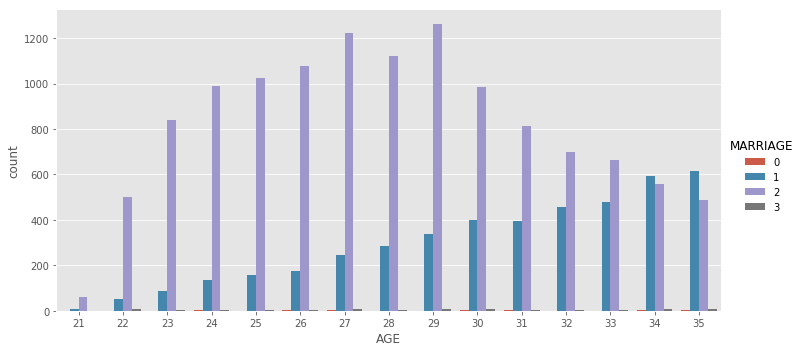

In [1090]:
# What is marital status of customers ages 21 to 35
sns.catplot('AGE', data=credit, kind='count', hue='MARRIAGE', hue_order=range(0,4), aspect=2,
              order = [21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])
credit.MARRIAGE.value_counts()


In [856]:
# In the graph above ^^ Marriage legend is 1 = married; 2 = single; 3 = divorce; 0=others

In [1134]:
# For tabulated values, use crosstab pandas method instead of the factorplot in seaborn
mStatus = pd.crosstab(index=[credit.AGE], columns=[credit.MARRIAGE])
#mStatus.columns = [['others','Married','Single','Divorce']]
mStatus.columns = [['married','single','divorce','others']]
mStatus

,married,single,divorce,others
AGE,,,,
21,0,8,56,0
22,0,52,493,6
23,1,86,826,2
24,2,132,979,2
25,0,152,1012,5
26,3,172,1062,2
27,2,241,1202,6
28,1,275,1111,3
29,1,331,1246,7


In [1135]:
mStatus.index

Int64Index([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
            38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
            55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
            72, 73, 74, 75, 79],
           dtype='int64', name='AGE')

In [1136]:
mStatus.columns

MultiIndex(levels=[['divorce', 'married', 'others', 'single']],
           codes=[[1, 3, 0, 2]])

In [1137]:
mStatus.index=[['21','22','23','24','25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
            '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
            '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71',
            '72', '73', '74', '75', '79']]

In [1138]:
mStatus

,married,single,divorce,others
21,0,8,56,0
22,0,52,493,6
23,1,86,826,2
24,2,132,979,2
25,0,152,1012,5
26,3,172,1062,2
27,2,241,1202,6
28,1,275,1111,3
29,1,331,1246,7
30,2,394,971,10


In [1096]:
# education per age level, first five rows
credit[['AGE','EDUCATION']].head()

,AGE,EDUCATION
0,24,2
1,26,2
2,34,2
3,37,2
4,57,2


In [1107]:
# hs_educ_male_df dataframe males with high school educ
hs_educ_male_df = pd.DataFrame(creditExtraCols[(creditExtraCols['EDUCATION'] == 3) & (creditExtraCols['SEX']==1)])
# Add High School column
hs_educ_male_df['High_School'] = 'Male_HS'

# hs_educ_female_df dataframe females with high school educ
hs_educ_female_df = pd.DataFrame(creditExtraCols[(creditExtraCols['EDUCATION'] == 3) & (creditExtraCols['SEX']==2)])
hs_educ_female_df['High_School'] = 'Female_HS'

# college ed male
col_educ_male_df = pd.DataFrame(creditExtraCols[(creditExtraCols['EDUCATION'] == 2) & (creditExtraCols['SEX']==1)])
# Add High School column
col_educ_male_df['High_School'] = 'Male_Col'

# college ed female
col_educ_female_df = pd.DataFrame(creditExtraCols[(creditExtraCols['EDUCATION'] == 2) & (creditExtraCols['SEX']==2)])
col_educ_female_df['High_School'] = 'Female_Col'

# grad school ed male
gradschool_educ_male_df = pd.DataFrame(creditExtraCols[(creditExtraCols['EDUCATION'] == 1) & (creditExtraCols['SEX']==1)])
# Add High School column
gradschool_educ_male_df['High_School'] = 'Male_Grad_School'

# grad school ed female
gradschool_educ_female_df = pd.DataFrame(creditExtraCols[(creditExtraCols['EDUCATION'] == 1) & (creditExtraCols['SEX']==2)])
gradschool_educ_female_df['High_School'] = 'Female_Grad_School'


####   ADD IN 4 5 6 FOR OTHER
# other ed male
other_educ_male_df = pd.DataFrame(creditExtraCols[(creditExtraCols['EDUCATION'] == 0) & (creditExtraCols['SEX']==1)])
# Add High School column
other_educ_male_df['High_School'] = 'Male_Other'

# other ed female
other_educ_female_df = pd.DataFrame(creditExtraCols[(creditExtraCols['EDUCATION'] == 0) & (creditExtraCols['SEX']==2)])
other_educ_female_df['High_School'] = 'Female_Other'


# Merge the above dataframes
comb = [hs_educ_male_df, hs_educ_female_df,col_educ_male_df,col_educ_female_df,gradschool_educ_male_df,gradschool_educ_female_df,other_educ_male_df,other_educ_female_df ]

# Merge and sort by index
creditExtraCols = pd.concat(comb).sort_index()
creditExtraCols

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,age_group,High_School
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,under_thirty,Female_Col
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,under_thirty,Female_Col
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,thirty_and_over,Female_Col
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,thirty_and_over,Female_Col
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,thirty_and_over,Male_Col
5,6,50000,1,1,2,37,0,0,0,0,...,20024,2500,1815,657,1000,1000,800,0,thirty_and_over,Male_Grad_School
6,7,500000,1,1,2,29,0,0,0,0,...,473944,55000,40000,38000,20239,13750,13770,0,under_thirty,Male_Grad_School
7,8,100000,2,2,2,23,0,-1,-1,0,...,567,380,601,0,581,1687,1542,0,under_thirty,Female_Col
8,9,140000,2,3,1,28,0,0,2,0,...,3719,3329,0,432,1000,1000,1000,0,under_thirty,Female_HS
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,13912,0,0,0,13007,1122,0,0,thirty_and_over,Male_HS


In [1098]:
# how many per category?
[len(hs_educ_male_df), len(hs_educ_female_df), len(col_educ_male_df),len(col_educ_female_df),len(gradschool_educ_male_df), len(gradschool_educ_female_df), len(other_educ_male_df),len(other_educ_female_df)]

[1990, 2927, 5374, 8656, 4354, 6231, 8, 6]

In [1099]:
# Show the first five records of the male college df
col_educ_male_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,age_group,High_School
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,thirty_and_over,Male_Col
13,14,70000,1,2,2,30,1,2,2,0,...,36894,3200,0,3000,3000,1500,0,1,thirty_and_over,Male_Col
31,32,50000,1,2,2,33,2,0,0,0,...,23680,1718,1500,1000,1000,1000,716,1,thirty_and_over,Male_Col
36,37,280000,1,2,1,40,0,0,0,0,...,177413,8026,8060,6300,6400,6400,6737,0,thirty_and_over,Male_Col
42,43,10000,1,2,2,22,0,0,0,0,...,4451,1500,2927,1000,300,1000,500,0,under_thirty,Male_Col


In [1100]:
# Show the first five records of the female college dataframe
col_educ_female_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,age_group,High_School
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,under_thirty,Female_Col
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,under_thirty,Female_Col
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,thirty_and_over,Female_Col
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,thirty_and_over,Female_Col
7,8,100000,2,2,2,23,0,-1,-1,0,...,567,380,601,0,581,1687,1542,0,under_thirty,Female_Col


In [1108]:
# Show the first five records of credit with the new column added named High_School
creditExtraCols.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,age_group,High_School
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,under_thirty,Female_Col
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,under_thirty,Female_Col
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,thirty_and_over,Female_Col
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,thirty_and_over,Female_Col
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,thirty_and_over,Male_Col


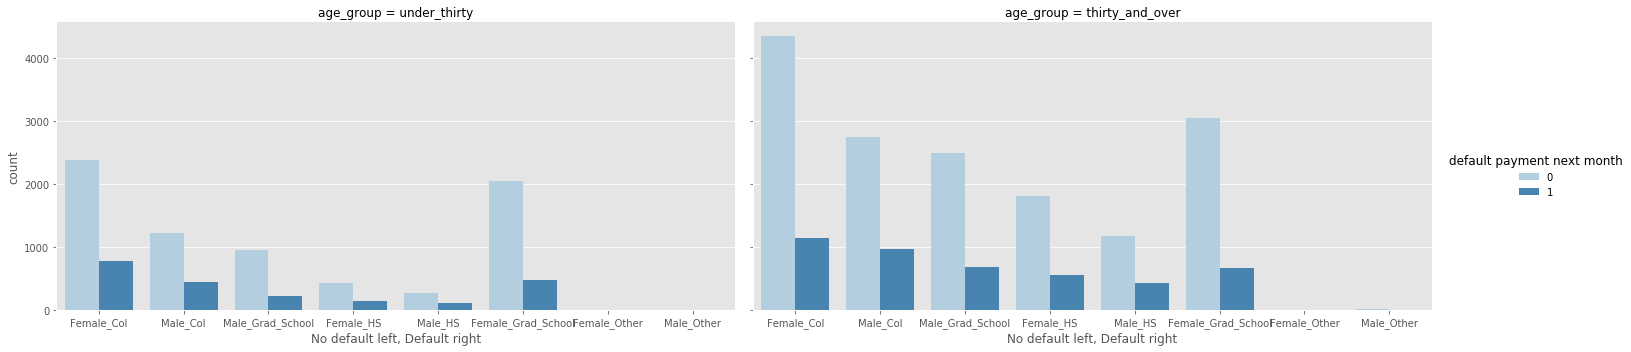

In [1109]:
# Look at default status in light of gender and educaztion, split by whether the age group is less than thirty or greater
fg=sns.catplot('High_School', data=creditExtraCols, kind='count', hue='default payment next month', col='age_group', 
                 hue_order=range(0,2),aspect=2, palette='Blues')
fg.set_xlabels('No default left, Default right')

In [1110]:
# rename target for map method below, and other efforts
credit = credit.rename(columns={'default payment next month': 'default_payment_next_month'})
creditExtraCols = creditExtraCols.rename(columns={'default payment next month': 'default_payment_next_month'})

In [1112]:
# Factors affecting default

'''Now lets look at the factors that help someone not default on payment. 
We start this analysis by adding a new
cloumn to the credit data frame. Use the 'default_payment_next_month' 
column to map to the new column with factors 0:no and 1:yes
using the map method'''
creditExtraCols['defaulted'] = creditExtraCols.default_payment_next_month.map({0:'no', 1:'yes'})

In [1139]:
creditExtraCols.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,age_group,High_School,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,under_thirty,Female_Col,yes
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,under_thirty,Female_Col,yes
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,thirty_and_over,Female_Col,no
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,thirty_and_over,Female_Col,no
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,thirty_and_over,Male_Col,no


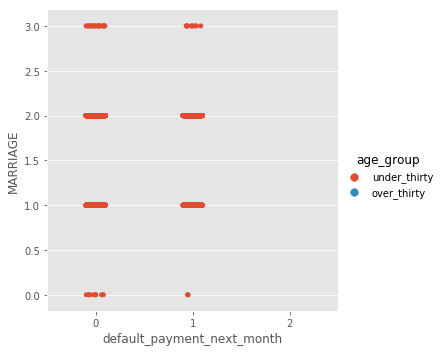

In [1140]:
# default payment made based on marital status and if age under thirty or over thirty

sns.catplot('default_payment_next_month', 'MARRIAGE', hue='age_group', data=creditExtraCols,order=range(0,3), hue_order = ['under_thirty','over_thirty'])

/Users/celestehofer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


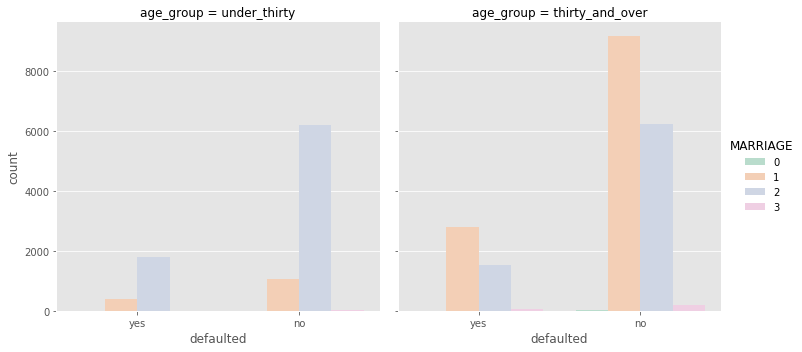

In [1141]:
# per age group, which marital status is most likely to default
sns.factorplot('defaulted', data=creditExtraCols, hue='MARRIAGE', kind='count', palette='Pastel2', hue_order=range(0,4),
              col='age_group')

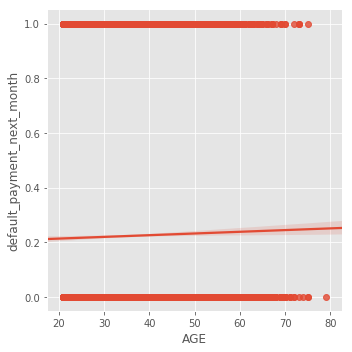

In [1117]:
# Linear plot of age vs. who defaulted
sns.lmplot( 'AGE','default_payment_next_month',  data=creditExtraCols)

In [875]:
# The above graph ^^ shows a slight upward trend in default rate with age

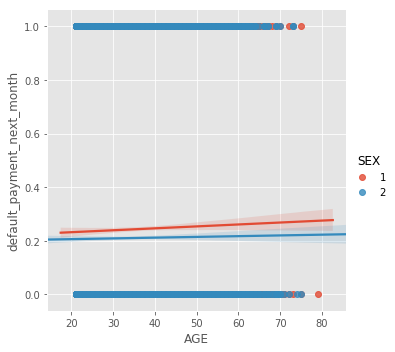

In [1118]:
# Linear plot of age vs. who defaulted grouped by sex
sns.lmplot( 'AGE','default_payment_next_month',  data=creditExtraCols, hue='SEX')

In [ ]:
# In the above graph it shows that females (2) are less likely to default than males (1) as 1 = default, 0 = . no default

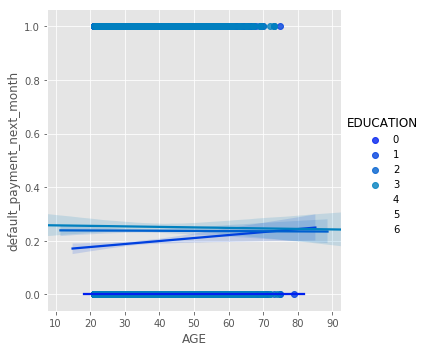

In [1119]:
# S# Linear plot of age vs. who defaulted grouped by education
sns.lmplot('AGE','default_payment_next_month', hue='EDUCATION', data=credit, palette='winter', hue_order=range(0,7))

In [1120]:
# the above graph shows that Education level 3 or high school, is most likely to default

Text(0.5, 1.0, "Distribution of Customers' Balance Limits")

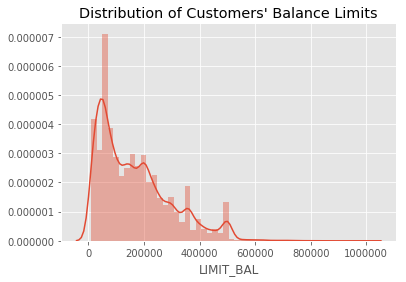

In [1123]:
# Distribution of balance limit so we can determine bins, with an overlay of a density plot
bal_lim = credit['LIMIT_BAL']
bal_dist = sns.distplot(bal_lim)
bal_dist.set_title("Distribution of Customers' Balance Limits")

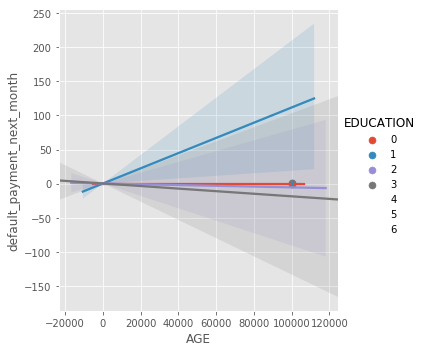

In [1124]:
# Create a balance limit bin
bal_limits = [100000,250000,500000,750000,1000000]
sns.lmplot('AGE','default_payment_next_month',hue='EDUCATION',data=credit,x_bins=bal_limits, hue_order=[0,1,2,3,4,5,6])

In [737]:
# Thr graph shows that education level 1, grad school, has the highest balance limit.  
# High school education has the lowest balance limit

In [1125]:
# balance limit factor
credit.LIMIT_BAL

0         20000
1        120000
2         90000
3         50000
4         50000
5         50000
6        500000
7        100000
8        140000
9         20000
10       200000
11       260000
12       630000
13        70000
14       250000
15        50000
16        20000
17       320000
18       360000
19       180000
20       130000
21       120000
22        70000
23       450000
24        90000
25        50000
26        60000
27        50000
28        50000
29        50000
          ...  
29970    360000
29971     80000
29972    190000
29973    230000
29974     50000
29975    220000
29976     40000
29977    420000
29978    310000
29979    180000
29980     50000
29981     50000
29982     90000
29983     20000
29984     30000
29985    240000
29986    360000
29987    130000
29988    250000
29989    150000
29990    140000
29991    210000
29992     10000
29993    100000
29994     80000
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length:

In [1126]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month', 'defaulted'],
      dtype='object')

In [1128]:
creditExtraCols.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month', 'age_group', 'High_School', 'defaulted'],
      dtype='object')

/Users/celestehofer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/celestehofer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(<seaborn.axisgrid.FacetGrid at 0x1a6f145a58>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x1a45645400>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1a45511550>))

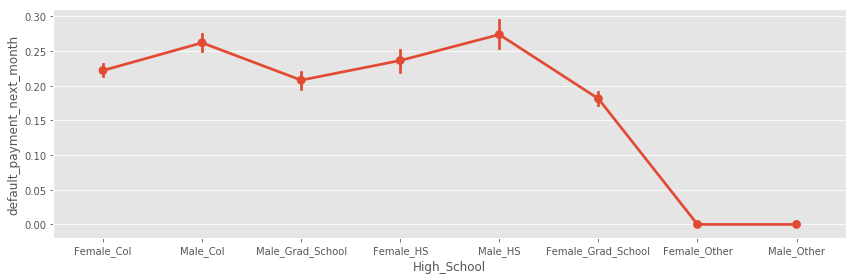

In [1129]:
sns.factorplot('High_School', 'default_payment_next_month', data=creditExtraCols,size=4,aspect=3)

#fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
fig, (axis1,axis2,axis3) 


In [1130]:
# 0 means no default, 1 means default.  Female other and male Other have lowest default rates. 
# This is not helpful since we don't know what 'Other' means.

/Users/celestehofer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


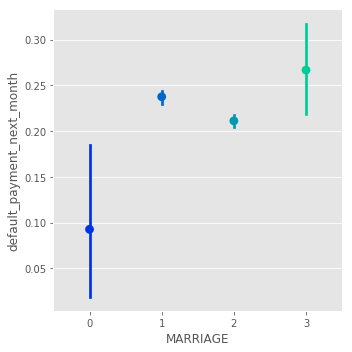

In [1142]:
# Family Status Factor
sns.factorplot('MARRIAGE', 'default_payment_next_month', data=creditExtraCols, palette='winter')

In [ ]:
# Looking above ^^ Divorced (3) have highest default rate.  

/Users/celestehofer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


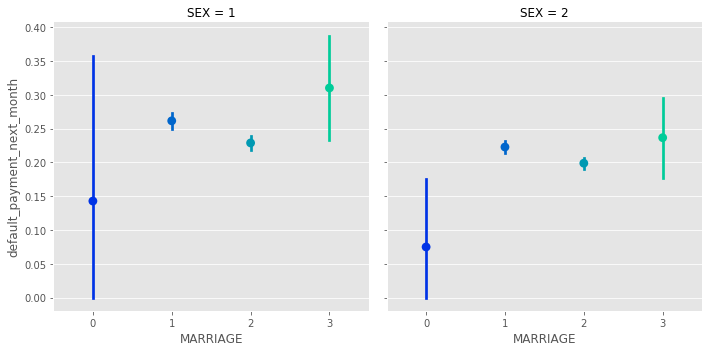

In [1143]:

sns.factorplot('MARRIAGE', 'default_payment_next_month', data=credit,palette='winter', col='SEX', col_order=[1,2])

In [ ]:
# ^^ Gender 1 is male, Gender 2 is female

# The Following Steps Are Not Based On The Titanic Example

## Clean Data

In [1144]:
print('Average and median age of customers are %0.f and %0.f years old, respectively'%(credit.AGE.mean(), 
                                                                          credit.AGE.median()))

Average and median age of customers are 35 and 34 years old, respectively


In [1145]:
# Need to add inplace = True or change is not made directly to the object
credit = credit.drop(columns=['ID'], axis=1) 

In [1146]:
# drop ID from second data frame
creditExtraCols = creditExtraCols.drop(columns=['ID'], axis=1) 

In [1147]:
credit.shape

(29546, 25)

In [1148]:
# Rename columns.  Having columns named PAY_0 and PAY_AMT1 are too similar
# PAY_0 will be renamed to Hx_PAY_Sept_05
# PAY_2 will be renamed to Hx_PAY_Aug_05
# PAY_3 will be renamed to Hx_PAY_Jul_05
# PAY_4 will be renamed to Hx_PAY_Jun_05
# PAY_5 will be renamed to Hx_PAY_May_05
# PAY_6 will be renamed to Hx_PAY_Apr_05
credit = credit.rename(columns={'PAY_0': 'Hx_PAY_Sept_05', 'PAY_2': 'Hx_PAY_Aug_05','PAY_3': 'Hx_PAY_Jul_05',
                                'PAY_4': 'Hx_PAY_Jun_05', 'PAY_5': 'Hx_PAY_May_05', 'PAY_6': 'Hx_PAY_Apr_05'})
creditExtraCols = creditExtraCols.rename(columns={'PAY_0': 'Hx_PAY_Sept_05', 'PAY_2': 'Hx_PAY_Aug_05','PAY_3': 'Hx_PAY_Jul_05',
                                'PAY_4': 'Hx_PAY_Jun_05', 'PAY_5': 'Hx_PAY_May_05', 'PAY_6': 'Hx_PAY_Apr_05'})

In [1149]:
# Rename Columns, for example:
# BILL_AMT1 wil be renamed to Bill_stmt_Sept_05
# BILL_AMT2 wil be renamed to Bill_stmt_Aug_05
# BILL_AMT3 wil be renamed to Bill_stmt_Jul_05
# BILL_AMT4 wil be renamed to Bill_stmt_Jum_05
# BILL_AMT5 wil be renamed to Bill_stmt_May_05
# BILL_AMT6 wil be renamed to Bill_stmt_Apr_05
credit = credit.rename(columns={'BILL_AMT1': 'Bill_stmt_Sept_05', 'BILL_AMT2': 'Bill_stmt_Aug_05','BILL_AMT3': 'Bill_stmt_Jul_05',
                                'BILL_AMT4': 'Bill_stmt_Jun_05', 'BILL_AMT5': 'Bill_stmt_May_05', 'BILL_AMT6': 'Bill_stmt_Apr_05'})
creditExtraCols = creditExtraCols.rename(columns={'BILL_AMT1': 'Bill_stmt_Sept_05', 'BILL_AMT2': 'Bill_stmt_Aug_05','BILL_AMT3': 'Bill_stmt_Jul_05',
                                'BILL_AMT4': 'Bill_stmt_Jun_05', 'BILL_AMT5': 'Bill_stmt_May_05', 'BILL_AMT6': 'Bill_stmt_Apr_05'})


In [1150]:
# Rename Columns, for example:
# PAY_AMT1 wil be renamed to Amt_Paid_Sept_05
# PAY_AMT2 wil be renamed to Amt_Paid_Aug_05
# PAY_AMT3 wil be renamed to Amt_Paid_Jul_05
# PAY_AMT4 wil be renamed to Amt_Paid_Jum_05
# PAY_AMT5 wil be renamed to Amt_Paid_May_05
# PAY_AMT6 wil be renamed to Amt_Paid_Apr_05

credit = credit.rename(columns={'PAY_AMT1': 'Amt_Paid_Sept_05', 'PAY_AMT2': 'Amt_Paid_Aug_05','PAY_AMT3': 'Amt_Paid_Jul_05',
                                'PAY_AMT4': 'Amt_Paid_Jun_05', 'PAY_AMT5': 'Amt_Paid_May_05', 'PAY_AMT6': 'Amt_Paid_Apr_05'})
creditExtraCols = creditExtraCols.rename(columns={'PAY_AMT1': 'Amt_Paid_Sept_05', 'PAY_AMT2': 'Amt_Paid_Aug_05','PAY_AMT3': 'Amt_Paid_Jul_05',
                                'PAY_AMT4': 'Amt_Paid_Jun_05', 'PAY_AMT5': 'Amt_Paid_May_05', 'PAY_AMT6': 'Amt_Paid_Apr_05'})

In [892]:
# rename target 
# credit = credit.rename(columns={'default payment next month': 'default_payment_next_month'})

In [1154]:
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Hx_PAY_Sept_05',
       'Hx_PAY_Aug_05', 'Hx_PAY_Jul_05', 'Hx_PAY_Jun_05', 'Hx_PAY_May_05',
       'Hx_PAY_Apr_05', 'Bill_stmt_Sept_05', 'Bill_stmt_Aug_05',
       'Bill_stmt_Jul_05', 'Bill_stmt_Jun_05', 'Bill_stmt_May_05',
       'Bill_stmt_Apr_05', 'Amt_Paid_Sept_05', 'Amt_Paid_Aug_05',
       'Amt_Paid_Jul_05', 'Amt_Paid_Jun_05', 'Amt_Paid_May_05',
       'Amt_Paid_Apr_05', 'default_payment_next_month'],
      dtype='object')

In [1155]:
creditExtraCols.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Hx_PAY_Sept_05',
       'Hx_PAY_Aug_05', 'Hx_PAY_Jul_05', 'Hx_PAY_Jun_05', 'Hx_PAY_May_05',
       'Hx_PAY_Apr_05', 'Bill_stmt_Sept_05', 'Bill_stmt_Aug_05',
       'Bill_stmt_Jul_05', 'Bill_stmt_Jun_05', 'Bill_stmt_May_05',
       'Bill_stmt_Apr_05', 'Amt_Paid_Sept_05', 'Amt_Paid_Aug_05',
       'Amt_Paid_Jul_05', 'Amt_Paid_Jun_05', 'Amt_Paid_May_05',
       'Amt_Paid_Apr_05', 'default_payment_next_month', 'age_group',
       'High_School', 'defaulted'],
      dtype='object')

## Transform Data Check for Nulls

In [1156]:
# Check for null values
credit.isnull().sum

<bound method DataFrame.sum of        LIMIT_BAL    SEX  EDUCATION  MARRIAGE    AGE  Hx_PAY_Sept_05  \
0          False  False      False     False  False           False   
1          False  False      False     False  False           False   
2          False  False      False     False  False           False   
3          False  False      False     False  False           False   
4          False  False      False     False  False           False   
5          False  False      False     False  False           False   
6          False  False      False     False  False           False   
7          False  False      False     False  False           False   
8          False  False      False     False  False           False   
9          False  False      False     False  False           False   
10         False  False      False     False  False           False   
11         False  False      False     False  False           False   
12         False  False      False     False  

In [1157]:
# check for totals of nulls
# there are none
len(credit) - credit.count()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
Hx_PAY_Sept_05                0
Hx_PAY_Aug_05                 0
Hx_PAY_Jul_05                 0
Hx_PAY_Jun_05                 0
Hx_PAY_May_05                 0
Hx_PAY_Apr_05                 0
Bill_stmt_Sept_05             0
Bill_stmt_Aug_05              0
Bill_stmt_Jul_05              0
Bill_stmt_Jun_05              0
Bill_stmt_May_05              0
Bill_stmt_Apr_05              0
Amt_Paid_Sept_05              0
Amt_Paid_Aug_05               0
Amt_Paid_Jul_05               0
Amt_Paid_Jun_05               0
Amt_Paid_May_05               0
Amt_Paid_Apr_05               0
default_payment_next_month    0
dtype: int64

In [1158]:
# sum number of NaNs
num_nans = credit.size - credit.count().sum()
print(num_nans)

0


In [600]:
# Drop missing values for the records in which age  is missing
# We have no missing values so will not use
# AGE = credit['AGE'].dropna()

In [601]:
# We have no missing values thus no need to calculate the MISSING VALUE RATIO
# Also no need to check creditExtraCols dats frame for nulls as it is based on the same data

## Data Reduction Check for Low Variance Remove Constant Features

In [1159]:
# sklearn.feature_selection.VarianceThreshold
# Zero is used as a parameter filter for features with zero variance
# example from https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/
constant_filter = VarianceThreshold(threshold=0)

In [1160]:
# Filter on this threshold
constant_filter.fit(credit)

VarianceThreshold(threshold=0)

In [1161]:
# Check for the number of our non-quasi-constant columns
len(credit.columns[constant_filter.get_support()])

24

In [1162]:
# Verify the number of quasi-constant columns
constant_columns = [column for column in credit.columns  
                    if column not in credit.columns[constant_filter.get_support()]]
print(len(constant_columns)) 

0


In [1163]:
# No columns found that have constant features
for column in constant_columns:  
    print(column)

## Data Reduction Check for Low Variance Remove Quasi-Constant Features

In [1164]:
# Filter on near constant features
qconstant_filter = VarianceThreshold(threshold=0.01) 
qconstant_filter.fit(credit)

VarianceThreshold(threshold=0.01)

In [1165]:
# find the number of columns that are quasi-constant
# NOTE: If we had found constant columns, remove them from the data frame before running this code
len(credit.columns[qconstant_filter.get_support()]) 

24

In [1166]:
qconstant_columns = [column for column in credit.columns  
                    if column not in credit.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))  

0


In [1167]:
# print names of quasi-constant columns
for column in qconstant_columns:  
    print(column)

In [39]:
# If we had columns with near zero variance, we could eliminate them using similar code
# This is an example of removing from training and test sets
# train_features = constant_filter.transform(train_features)  
# test_features = constant_filter.transform(test_features)
# train_features.shape, test_features.shape  

In [1168]:
#  Another approach, but I could not find much further information 
# . Calculate the variance of all the numerical variables.
# Then drop the variables having low variance as compared to other variables in our dataset
credit.var()

LIMIT_BAL                     1.687301e+10
SEX                           2.393729e-01
EDUCATION                     4.894196e-01
MARRIAGE                      2.722316e-01
AGE                           8.492579e+01
Hx_PAY_Sept_05                1.265077e+00
Hx_PAY_Aug_05                 1.440849e+00
Hx_PAY_Jul_05                 1.442090e+00
Hx_PAY_Jun_05                 1.375877e+00
Hx_PAY_May_05                 1.292250e+00
Hx_PAY_Apr_05                 1.329054e+00
Bill_stmt_Sept_05             5.370798e+09
Bill_stmt_Aug_05              5.021840e+09
Bill_stmt_Jul_05              4.770319e+09
Bill_stmt_Jun_05              4.117394e+09
Bill_stmt_May_05              3.681475e+09
Bill_stmt_Apr_05              3.539407e+09
Amt_Paid_Sept_05              2.754821e+08
Amt_Paid_Aug_05               5.332974e+08
Amt_Paid_Jul_05               3.067099e+08
Amt_Paid_Jun_05               2.470093e+08
Amt_Paid_May_05               2.319986e+08
Amt_Paid_Apr_05               3.120706e+08
default_pay

## Data Reduction Remove Duplicate Features (Rows)

In [1170]:
# First transpose our data set
credit_T = credit.T
credit_T.shape
# Look for duplicated rows using pandas duplicated method
# Remember, the rows of the transposed dataframe are actually the columns or the features of the actual dataframe.
print(credit_T.duplicated().sum())
# NO DUPLICATE ROWS FOUND

0


In [924]:
# If we had duplicate rows we could drop them using drop_duplicates()
# https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/
# Finally, we can drop the duplicate rows using the drop_duplicates() method. 
# If you pass the string value first to the keep parameter of the drop_duplicates() method, 
# all the duplicate rows will be dropped except the first copy. 
# In the next step we will remove all the duplicate rows and will take transpose of the 
# transposed training set to get the original training set that doesn't contain any duplicate column.

# unique_features = credit_T.drop_duplicates(keep='first').T  

# look at shape of data frame

# unique_features.shape

# NOTE: Retranspose data back 

## Data Discretization or Binning

In [981]:
# The response variable is already binned; default payment (Yes = 1, No = 0), 
# May want to bin Education fields of 0, 4, 5, 6 together as they are not defined.
# Not sure binning use pandas.cut
# Create a balance limit bin
bal_limits = [100000,250000,500000,750000,1000000]
pd.cut

<function pandas.core.reshape.tile.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise')>

### Bin Balance Limit by 100,000 Dollar Range

In [1180]:
# find minimum value in the LIMIT_BAL column
credit.min()

LIMIT_BAL                      10000
SEX                                1
EDUCATION                          0
MARRIAGE                           0
AGE                               21
Hx_PAY_Sept_05                    -2
Hx_PAY_Aug_05                     -2
Hx_PAY_Jul_05                     -2
Hx_PAY_Jun_05                     -2
Hx_PAY_May_05                     -2
Hx_PAY_Apr_05                     -2
Bill_stmt_Sept_05            -165580
Bill_stmt_Aug_05              -69777
Bill_stmt_Jul_05             -157264
Bill_stmt_Jun_05             -170000
Bill_stmt_May_05              -81334
Bill_stmt_Apr_05             -339603
Amt_Paid_Sept_05                   0
Amt_Paid_Aug_05                    0
Amt_Paid_Jul_05                    0
Amt_Paid_Jun_05                    0
Amt_Paid_May_05                    0
Amt_Paid_Apr_05                    0
default_payment_next_month         0
dtype: int64

In [1181]:
# find maximum value in the LIMIT_BAL column
credit.max()

LIMIT_BAL                     1000000
SEX                                 2
EDUCATION                           3
MARRIAGE                            3
AGE                                79
Hx_PAY_Sept_05                      8
Hx_PAY_Aug_05                       8
Hx_PAY_Jul_05                       8
Hx_PAY_Jun_05                       8
Hx_PAY_May_05                       8
Hx_PAY_Apr_05                       8
Bill_stmt_Sept_05              964511
Bill_stmt_Aug_05               983931
Bill_stmt_Jul_05              1664089
Bill_stmt_Jun_05               891586
Bill_stmt_May_05               927171
Bill_stmt_Apr_05               961664
Amt_Paid_Sept_05               873552
Amt_Paid_Aug_05               1684259
Amt_Paid_Jul_05                896040
Amt_Paid_Jun_05                621000
Amt_Paid_May_05                426529
Amt_Paid_Apr_05                528666
default_payment_next_month          1
dtype: int64

In [1182]:
# minumum credit limit is 10000
BAL_LIMIT_GROUPED = ["{0}s".format(LIMIT_BAL) for LIMIT_BAL in range(10000, 1200000, 200000)]
BAL_LIMIT_GROUPED



['10000s', '210000s', '410000s', '610000s', '810000s', '1010000s']

In [1183]:
count_unique_BAL_LIMIT_GROUPED = len(BAL_LIMIT_GROUPED)
count_unique_BAL_LIMIT_GROUPED

6

In [1184]:
creditExtraCols['BAL_LIMIT_GROUPED'] = pd.cut(x=credit['LIMIT_BAL'], bins=count_unique_BAL_LIMIT_GROUPED, labels=BAL_LIMIT_GROUPED)
creditExtraCols.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,...,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,default_payment_next_month,age_group,High_School,defaulted,BAL_LIMIT_GROUPED
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,1,under_thirty,Female_Col,yes,10000s
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,1000,0,2000,1,under_thirty,Female_Col,yes,10000s
2,90000,2,2,2,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,thirty_and_over,Female_Col,no,10000s
3,50000,2,2,1,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,thirty_and_over,Female_Col,no,10000s
4,50000,1,2,1,57,-1,0,-1,0,0,...,36681,10000,9000,689,679,0,thirty_and_over,Male_Col,no,10000s


### Bin age by decade

In [1185]:
age_by_decade = ["{0}s".format(age) for age in range(20, 80, 10)]
age_by_decade

['20s', '30s', '40s', '50s', '60s', '70s']

In [1186]:
count_unique_age_decades = len(age_by_decade)
count_unique_age_decades

6

In [1187]:
creditExtraCols['age_by_decade'] = pd.cut(x=credit['AGE'], bins=count_unique_age_decades, labels=age_by_decade)
creditExtraCols.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,...,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05,default_payment_next_month,age_group,High_School,defaulted,BAL_LIMIT_GROUPED,age_by_decade
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,1,under_thirty,Female_Col,yes,10000s,20s
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,0,2000,1,under_thirty,Female_Col,yes,10000s,20s
2,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,thirty_and_over,Female_Col,no,10000s,30s
3,50000,2,2,1,37,0,0,0,0,0,...,1200,1100,1069,1000,0,thirty_and_over,Female_Col,no,10000s,30s
4,50000,1,2,1,57,-1,0,-1,0,0,...,10000,9000,689,679,0,thirty_and_over,Male_Col,no,10000s,50s


## Data Reduction Check Data for Colinearity

In [1171]:
# Determine what data is highly correlated
# drop the target variable before we determine colinearity
credit2=credit.drop('default_payment_next_month', 1)
corr = credit2.corr().abs()

In [1172]:
corrUnstacked = corr.unstack()

In [1173]:
# sortedCorr = corrUnstacked.sort_values(kind="quicksort") > 0.9
sortedCorr = corrUnstacked.sort_values(kind="quicksort")

In [1174]:
print(sortedCorr)

Amt_Paid_Sept_05   SEX                  0.000555
SEX                Amt_Paid_Sept_05     0.000555
Amt_Paid_Sept_05   Hx_PAY_Jul_05        0.000747
Hx_PAY_Jul_05      Amt_Paid_Sept_05     0.000747
Amt_Paid_Aug_05    SEX                  0.001370
SEX                Amt_Paid_Aug_05      0.001370
Hx_PAY_Apr_05      Amt_Paid_Sept_05     0.001437
Amt_Paid_Sept_05   Hx_PAY_Apr_05        0.001437
Bill_stmt_Aug_05   EDUCATION            0.001486
EDUCATION          Bill_stmt_Aug_05     0.001486
SEX                Amt_Paid_May_05      0.001990
Amt_Paid_May_05    SEX                  0.001990
Amt_Paid_Jun_05    SEX                  0.002210
SEX                Amt_Paid_Jun_05      0.002210
MARRIAGE           Amt_Paid_Jul_05      0.002214
Amt_Paid_Jul_05    MARRIAGE             0.002214
MARRIAGE           Amt_Paid_May_05      0.002298
Amt_Paid_May_05    MARRIAGE             0.002298
Amt_Paid_Apr_05    SEX                  0.002310
SEX                Amt_Paid_Apr_05      0.002310
Amt_Paid_Aug_05    H

In [1175]:
# also need to look to make sure that there are no 1.0 correlations that are valid, 
# so keep above code
sortedCorr2 = corrUnstacked.sort_values(kind="quicksort", ascending = False).drop_duplicates()

In [930]:
# sortedCorr2 = corrUnstacked.sort_values(kind="quicksort", ascending = False,  inplace = True).drop_duplicates()

In [1176]:
print(sortedCorr2)

Amt_Paid_Apr_05    Amt_Paid_Apr_05      1.000000
Bill_stmt_Sept_05  Bill_stmt_Aug_05     0.951474
Bill_stmt_Apr_05   Bill_stmt_May_05     0.947370
Bill_stmt_Jun_05   Bill_stmt_May_05     0.940557
Bill_stmt_Aug_05   Bill_stmt_Jul_05     0.927706
Bill_stmt_Jul_05   Bill_stmt_Jun_05     0.925300
Bill_stmt_Jun_05   Bill_stmt_Apr_05     0.902575
Bill_stmt_Aug_05   Bill_stmt_Jun_05     0.893793
Bill_stmt_Sept_05  Bill_stmt_Jul_05     0.892047
Bill_stmt_Jul_05   Bill_stmt_May_05     0.885914
Bill_stmt_May_05   Bill_stmt_Aug_05     0.861906
Bill_stmt_Sept_05  Bill_stmt_Jun_05     0.861671
Bill_stmt_Jul_05   Bill_stmt_Apr_05     0.855911
Bill_stmt_Aug_05   Bill_stmt_Apr_05     0.834355
Bill_stmt_Sept_05  Bill_stmt_May_05     0.831899
Hx_PAY_Jun_05      Hx_PAY_May_05        0.819731
Hx_PAY_May_05      Hx_PAY_Apr_05        0.817386
Bill_stmt_Apr_05   Bill_stmt_Sept_05    0.805348
Hx_PAY_Jun_05      Hx_PAY_Jul_05        0.776875
Hx_PAY_Aug_05      Hx_PAY_Jul_05        0.765940
Hx_PAY_Jun_05      H

In [1177]:
relevant_features = sortedCorr2[sortedCorr2>0.9]
print(relevant_features)

Amt_Paid_Apr_05    Amt_Paid_Apr_05     1.000000
Bill_stmt_Sept_05  Bill_stmt_Aug_05    0.951474
Bill_stmt_Apr_05   Bill_stmt_May_05    0.947370
Bill_stmt_Jun_05   Bill_stmt_May_05    0.940557
Bill_stmt_Aug_05   Bill_stmt_Jul_05    0.927706
Bill_stmt_Jul_05   Bill_stmt_Jun_05    0.925300
Bill_stmt_Jun_05   Bill_stmt_Apr_05    0.902575
dtype: float64


In [1178]:
# remove these features of Bill_stmt_Aug_05, Bill_stmt_May_05,  and Bill_stmt_Jun_05
# check for colinearity again
# create new data frame creditCorr with correlated features removed
creditCorr=credit.drop(['Bill_stmt_Aug_05', 'Bill_stmt_May_05', 'Bill_stmt_Jun_05'], 1)
creditCorr.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Hx_PAY_Sept_05',
       'Hx_PAY_Aug_05', 'Hx_PAY_Jul_05', 'Hx_PAY_Jun_05', 'Hx_PAY_May_05',
       'Hx_PAY_Apr_05', 'Bill_stmt_Sept_05', 'Bill_stmt_Jul_05',
       'Bill_stmt_Apr_05', 'Amt_Paid_Sept_05', 'Amt_Paid_Aug_05',
       'Amt_Paid_Jul_05', 'Amt_Paid_Jun_05', 'Amt_Paid_May_05',
       'Amt_Paid_Apr_05', 'default_payment_next_month'],
      dtype='object')

In [1179]:
# Run the correlation on the new data frame to verify all highly correlated vars above 0.9 are removed
corr2 = creditCorr.corr().abs()
corrUnstacked2 = corr2.unstack()
sortedCorr22 = corrUnstacked2.sort_values(kind="quicksort")
# check at level of 0.8 to verify
relevant_features2 = sortedCorr22[sortedCorr22>0.8]
print(relevant_features2)

Bill_stmt_Apr_05            Bill_stmt_Sept_05             0.805348
Bill_stmt_Sept_05           Bill_stmt_Apr_05              0.805348
Hx_PAY_May_05               Hx_PAY_Apr_05                 0.817386
Hx_PAY_Apr_05               Hx_PAY_May_05                 0.817386
Hx_PAY_May_05               Hx_PAY_Jun_05                 0.819731
Hx_PAY_Jun_05               Hx_PAY_May_05                 0.819731
Bill_stmt_Jul_05            Bill_stmt_Apr_05              0.855911
Bill_stmt_Apr_05            Bill_stmt_Jul_05              0.855911
Bill_stmt_Jul_05            Bill_stmt_Sept_05             0.892047
Bill_stmt_Sept_05           Bill_stmt_Jul_05              0.892047
LIMIT_BAL                   LIMIT_BAL                     1.000000
Hx_PAY_Apr_05               Hx_PAY_Apr_05                 1.000000
Amt_Paid_May_05             Amt_Paid_May_05               1.000000
SEX                         SEX                           1.000000
EDUCATION                   EDUCATION                     1.00

In [ ]:
# repeat the steps above determining if having extra 
# columns affects colinearity using the creditExtraCols data frame

In [1199]:
# Determine what data is highly correlated
# drop the target variable before we determine colinearity
creditEx1=creditExtraCols.drop('default_payment_next_month', 1)
corrEx = creditEx1.corr().abs()

In [1200]:
# examine this data frame
corrEx

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Hx_PAY_Sept_05,Hx_PAY_Aug_05,Hx_PAY_Jul_05,Hx_PAY_Jun_05,Hx_PAY_May_05,...,Bill_stmt_Jul_05,Bill_stmt_Jun_05,Bill_stmt_May_05,Bill_stmt_Apr_05,Amt_Paid_Sept_05,Amt_Paid_Aug_05,Amt_Paid_Jul_05,Amt_Paid_Jun_05,Amt_Paid_May_05,Amt_Paid_Apr_05
LIMIT_BAL,1.000000,0.023987,0.255170,0.107229,0.144055,0.272020,0.296843,0.287012,0.268157,0.250042,...,0.282522,0.294293,0.296385,0.290561,0.195877,0.178252,0.211004,0.203631,0.217503,0.219876
SEX,0.023987,1.000000,0.011808,0.031616,0.091332,0.057272,0.070477,0.066093,0.060252,0.055120,...,0.025058,0.022440,0.017369,0.017265,0.000555,0.001370,0.008244,0.002210,0.001990,0.002310
EDUCATION,0.255170,0.011808,1.000000,0.158284,0.193189,0.131911,0.153691,0.146158,0.138354,0.124316,...,0.003658,0.014357,0.017471,0.014337,0.046076,0.040454,0.057200,0.044442,0.051668,0.054112
MARRIAGE,0.107229,0.031616,0.158284,1.000000,0.415354,0.018444,0.022907,0.031779,0.032665,0.035415,...,0.023999,0.021680,0.024023,0.020089,0.005909,0.007371,0.002214,0.013350,0.002298,0.005160
AGE,0.144055,0.091332,0.193189,0.415354,1.000000,0.040156,0.050221,0.053153,0.049946,0.053934,...,0.051651,0.049252,0.047830,0.046176,0.025168,0.022589,0.028973,0.021550,0.021406,0.018878
Hx_PAY_Sept_05,0.272020,0.057272,0.131911,0.018444,0.040156,1.000000,0.671762,0.573850,0.538783,0.509638,...,0.179020,0.178137,0.179709,0.176464,0.080535,0.070641,0.070986,0.064736,0.059937,0.060158
Hx_PAY_Aug_05,0.296843,0.070477,0.153691,0.022907,0.050221,0.671762,1.000000,0.765940,0.661313,0.622154,...,0.223324,0.221241,0.220189,0.218152,0.081680,0.059325,0.056145,0.047890,0.038418,0.037450
Hx_PAY_Jul_05,0.287012,0.066093,0.146158,0.031779,0.053153,0.573850,0.765940,1.000000,0.776875,0.686237,...,0.226689,0.226419,0.224287,0.221398,0.000747,0.067333,0.053347,0.046655,0.037254,0.036992
Hx_PAY_Jun_05,0.268157,0.060252,0.138354,0.032665,0.049946,0.538783,0.661313,0.776875,1.000000,0.819731,...,0.244322,0.245010,0.241956,0.238251,0.010043,0.002599,0.069691,0.044166,0.034874,0.027857
Hx_PAY_May_05,0.250042,0.055120,0.124316,0.035415,0.053934,0.509638,0.622154,0.686237,0.819731,1.000000,...,0.242896,0.270974,0.268787,0.261521,0.006676,0.003533,0.008334,0.059063,0.034774,0.023826


In [1202]:
corrUnstackedEx = corrEx.unstack()

In [1203]:
# sortedCorr = corrUnstacked.sort_values(kind="quicksort") > 0.9
sortedCorrEx = corrUnstackedEx.sort_values(kind="quicksort")

In [1204]:
print(sortedCorrEx)

Amt_Paid_Sept_05   SEX                  0.000555
SEX                Amt_Paid_Sept_05     0.000555
Amt_Paid_Sept_05   Hx_PAY_Jul_05        0.000747
Hx_PAY_Jul_05      Amt_Paid_Sept_05     0.000747
Amt_Paid_Aug_05    SEX                  0.001370
SEX                Amt_Paid_Aug_05      0.001370
Hx_PAY_Apr_05      Amt_Paid_Sept_05     0.001437
Amt_Paid_Sept_05   Hx_PAY_Apr_05        0.001437
Bill_stmt_Aug_05   EDUCATION            0.001486
EDUCATION          Bill_stmt_Aug_05     0.001486
SEX                Amt_Paid_May_05      0.001990
Amt_Paid_May_05    SEX                  0.001990
Amt_Paid_Jun_05    SEX                  0.002210
SEX                Amt_Paid_Jun_05      0.002210
MARRIAGE           Amt_Paid_Jul_05      0.002214
Amt_Paid_Jul_05    MARRIAGE             0.002214
MARRIAGE           Amt_Paid_May_05      0.002298
Amt_Paid_May_05    MARRIAGE             0.002298
Amt_Paid_Apr_05    SEX                  0.002310
SEX                Amt_Paid_Apr_05      0.002310
Amt_Paid_Aug_05    H

In [1205]:
# also need to look to make sure that there are no 1.0 correlations that are valid, 
# so keep above code
sortedCorrEx = corrUnstackedEx.sort_values(kind="quicksort", ascending = False).drop_duplicates()

In [1206]:
# sortedCorr2 = corrUnstacked.sort_values(kind="quicksort", ascending = False,  inplace = True).drop_duplicates()

In [1207]:
print(sortedCorrEx)

Amt_Paid_Apr_05    Amt_Paid_Apr_05      1.000000
Bill_stmt_Sept_05  Bill_stmt_Aug_05     0.951474
Bill_stmt_Apr_05   Bill_stmt_May_05     0.947370
Bill_stmt_Jun_05   Bill_stmt_May_05     0.940557
Bill_stmt_Aug_05   Bill_stmt_Jul_05     0.927706
Bill_stmt_Jul_05   Bill_stmt_Jun_05     0.925300
Bill_stmt_Jun_05   Bill_stmt_Apr_05     0.902575
Bill_stmt_Aug_05   Bill_stmt_Jun_05     0.893793
Bill_stmt_Sept_05  Bill_stmt_Jul_05     0.892047
Bill_stmt_Jul_05   Bill_stmt_May_05     0.885914
Bill_stmt_May_05   Bill_stmt_Aug_05     0.861906
Bill_stmt_Sept_05  Bill_stmt_Jun_05     0.861671
Bill_stmt_Jul_05   Bill_stmt_Apr_05     0.855911
Bill_stmt_Aug_05   Bill_stmt_Apr_05     0.834355
Bill_stmt_Sept_05  Bill_stmt_May_05     0.831899
Hx_PAY_Jun_05      Hx_PAY_May_05        0.819731
Hx_PAY_May_05      Hx_PAY_Apr_05        0.817386
Bill_stmt_Apr_05   Bill_stmt_Sept_05    0.805348
Hx_PAY_Jun_05      Hx_PAY_Jul_05        0.776875
Hx_PAY_Aug_05      Hx_PAY_Jul_05        0.765940
Hx_PAY_Jun_05      H

In [1208]:
relevant_features = sortedCorrEx[sortedCorrEx>0.9]
print(relevant_features)

Amt_Paid_Apr_05    Amt_Paid_Apr_05     1.000000
Bill_stmt_Sept_05  Bill_stmt_Aug_05    0.951474
Bill_stmt_Apr_05   Bill_stmt_May_05    0.947370
Bill_stmt_Jun_05   Bill_stmt_May_05    0.940557
Bill_stmt_Aug_05   Bill_stmt_Jul_05    0.927706
Bill_stmt_Jul_05   Bill_stmt_Jun_05    0.925300
Bill_stmt_Jun_05   Bill_stmt_Apr_05    0.902575
dtype: float64


In [1209]:
# remove these features of Bill_stmt_Aug_05, Bill_stmt_May_05,  and Bill_stmt_Jun_05
# check for colinearity again
# create new data frame creditCorr with correlated features removed
creditCorrEx=creditEx.drop(['Bill_stmt_Aug_05', 'Bill_stmt_May_05', 'Bill_stmt_Jun_05'], 1)
creditCorrEx.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Hx_PAY_Sept_05',
       'Hx_PAY_Aug_05', 'Hx_PAY_Jul_05', 'Hx_PAY_Jun_05', 'Hx_PAY_May_05',
       'Hx_PAY_Apr_05', 'Bill_stmt_Sept_05', 'Bill_stmt_Jul_05',
       'Bill_stmt_Apr_05', 'Amt_Paid_Sept_05', 'Amt_Paid_Aug_05',
       'Amt_Paid_Jul_05', 'Amt_Paid_Jun_05', 'Amt_Paid_May_05',
       'Amt_Paid_Apr_05', 'age_group', 'High_School', 'defaulted',
       'BAL_LIMIT_GROUPED', 'age_by_decade'],
      dtype='object')

## Text Cleaning

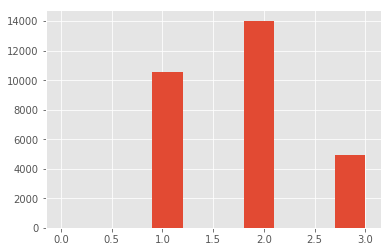

In [1210]:
# Histogram of variables listed below in Histogram section.  Confirms we can think of 0,4,5,6 together as 'Other' category
# This histogram was rendered before changing Education values 4,5,6, to 0
plt.hist(credit['EDUCATION'])
plt.show()

In [1212]:
# Changing values 4, 5, 6 to 0 so that they represent 
# the same value of Other. 
# It makes no sense to keep 4, 5, 6, 0 distinct if we don't know what they represent
# X3: Education (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others). X4: 
credit.loc[credit['EDUCATION'] > 3, 'EDUCATION'] = 0
creditExtraCols.loc[creditExtraCols['EDUCATION'] > 3, 'EDUCATION'] = 0
creditCorr.loc[creditCorr['EDUCATION'] > 3, 'EDUCATION'] = 0
creditCorrEx.loc[creditCorrEx['EDUCATION'] > 3, 'EDUCATION'] = 0

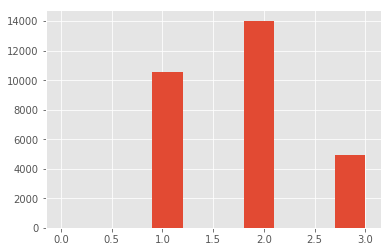

In [1213]:
# This was rendered after changing Education values 4,5,6, to 0
plt.hist(credit['EDUCATION'])
plt.show()

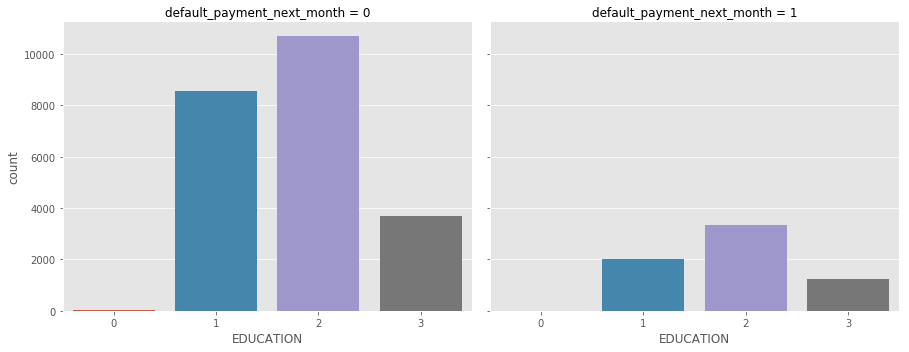

In [1214]:
# Repeat the graph rendered in the Titanic section with the "other" data grouped together the customers by educational status
sns.catplot('EDUCATION', data=credit, kind='count', col='default_payment_next_month', order=[0,1,2,3], 
               hue_order=['1','2'],  aspect=1.25, height=5)

## Perform Explanatory Data Analysis

In [1215]:
# Use the Matplotlib library; Seaborn is also a popular library
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Hx_PAY_Sept_05',
       'Hx_PAY_Aug_05', 'Hx_PAY_Jul_05', 'Hx_PAY_Jun_05', 'Hx_PAY_May_05',
       'Hx_PAY_Apr_05', 'Bill_stmt_Sept_05', 'Bill_stmt_Aug_05',
       'Bill_stmt_Jul_05', 'Bill_stmt_Jun_05', 'Bill_stmt_May_05',
       'Bill_stmt_Apr_05', 'Amt_Paid_Sept_05', 'Amt_Paid_Aug_05',
       'Amt_Paid_Jul_05', 'Amt_Paid_Jun_05', 'Amt_Paid_May_05',
       'Amt_Paid_Apr_05', 'default_payment_next_month'],
      dtype='object')


## Histogram

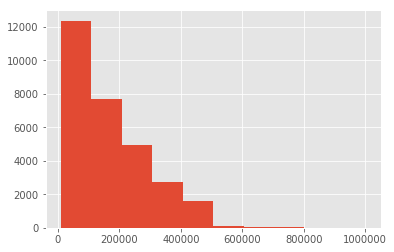

In [1216]:
# Build a histogram
plt.hist(credit['LIMIT_BAL'])
plt.show()

(array([2.2931e+04, 6.4140e+03, 1.9500e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

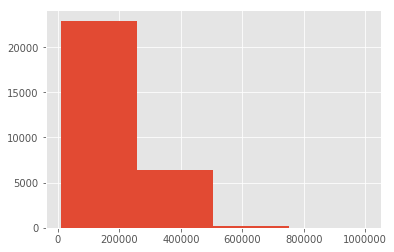

In [1217]:
# Specify the # of bins to use
plt.hist(credit['LIMIT_BAL'], bins=4)

## Lineplots

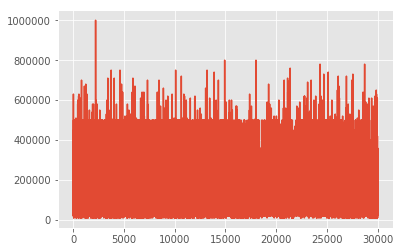

In [1218]:
# Lineplots can be created for a single variable or for multiple variables at once (multivariate)
plt.plot(credit['LIMIT_BAL'])
plt.show()

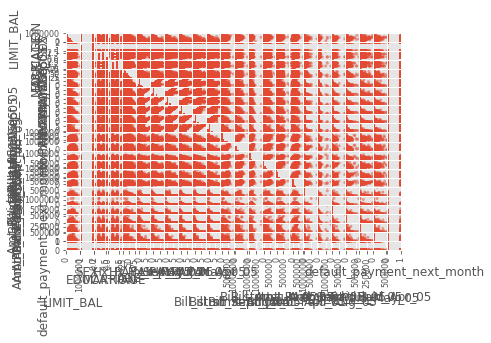

In [1219]:
# multivariate
scatter_matrix(credit)
plt.show()

## Scatter Plots

In [1220]:
# Scatter plots are used for comparing two features (bivariate and multivariate)
x = credit['Hx_PAY_Sept_05']
y = credit['Hx_PAY_Aug_05']

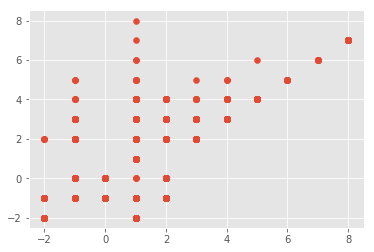

In [1221]:
plt.scatter(x,y)
plt.show()

In [179]:
# use another scatter plot

## Box or Box & Whisker Plots

In [1222]:
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Hx_PAY_Sept_05',
       'Hx_PAY_Aug_05', 'Hx_PAY_Jul_05', 'Hx_PAY_Jun_05', 'Hx_PAY_May_05',
       'Hx_PAY_Apr_05', 'Bill_stmt_Sept_05', 'Bill_stmt_Aug_05',
       'Bill_stmt_Jul_05', 'Bill_stmt_Jun_05', 'Bill_stmt_May_05',
       'Bill_stmt_Apr_05', 'Amt_Paid_Sept_05', 'Amt_Paid_Aug_05',
       'Amt_Paid_Jul_05', 'Amt_Paid_Jun_05', 'Amt_Paid_May_05',
       'Amt_Paid_Apr_05', 'default_payment_next_month'],
      dtype='object')


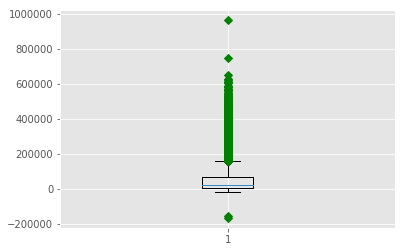

In [1223]:
A = credit['Bill_stmt_Sept_05']
plt.boxplot(A,0,'gD')
plt.show()

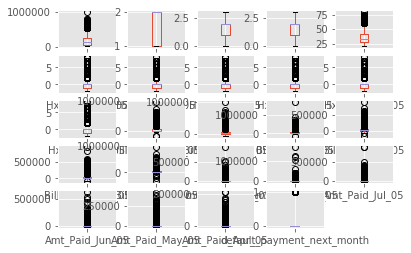

In [1224]:
# box and whisker plot  https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/
credit.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False)
plt.show()

## Univariate Density Plot

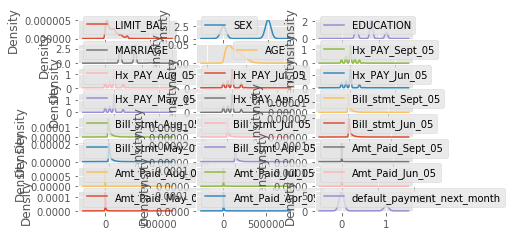

In [1225]:
credit.plot(kind='density', subplots=True, layout=(9,3), sharex=False)
plt.show()

## Correlation Plot

In [1226]:
# From correlation plot above  ID has been removed
print(corr)

                   LIMIT_BAL       SEX  EDUCATION  MARRIAGE       AGE  \
LIMIT_BAL           1.000000  0.023987   0.255170  0.107229  0.144055   
SEX                 0.023987  1.000000   0.011808  0.031616  0.091332   
EDUCATION           0.255170  0.011808   1.000000  0.158284  0.193189   
MARRIAGE            0.107229  0.031616   0.158284  1.000000  0.415354   
AGE                 0.144055  0.091332   0.193189  0.415354  1.000000   
Hx_PAY_Sept_05      0.272020  0.057272   0.131911  0.018444  0.040156   
Hx_PAY_Aug_05       0.296843  0.070477   0.153691  0.022907  0.050221   
Hx_PAY_Jul_05       0.287012  0.066093   0.146158  0.031779  0.053153   
Hx_PAY_Jun_05       0.268157  0.060252   0.138354  0.032665  0.049946   
Hx_PAY_May_05       0.250042  0.055120   0.124316  0.035415  0.053934   
Hx_PAY_Apr_05       0.236643  0.043910   0.111105  0.034761  0.049568   
Bill_stmt_Sept_05   0.284482  0.033932   0.004268  0.022768  0.054513   
Bill_stmt_Aug_05    0.277520  0.031376   0.001486  

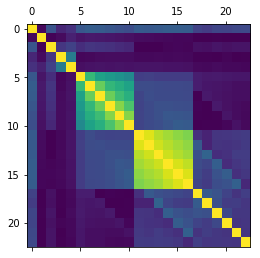

In [941]:
# plot sorted correlation
plt.matshow(corr)
plt.show()

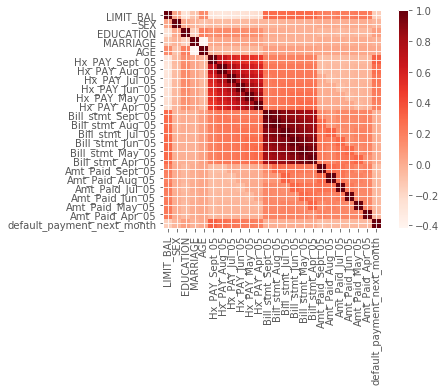

In [1227]:
# use imshow() method from matplotlib
plt.style.use('ggplot')

plt.imshow(credit.corr(), cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(credit.columns))]
plt.xticks(tick_marks, credit.columns, rotation='vertical')
plt.yticks(tick_marks, credit.columns)
plt.show()

# Covariance Matrix

In [1228]:
# Prints basic covariance matrix
# Be sure to use iloc when establishing your variable so you can select the specific features/variables you want to measure.
covMat = credit.cov()
print(covMat)

                               LIMIT_BAL          SEX     EDUCATION  \
LIMIT_BAL                   1.687301e+10  1524.464737 -23188.206040   
SEX                         1.524465e+03     0.239373      0.004042   
EDUCATION                  -2.318821e+04     0.004042      0.489420   
MARRIAGE                   -7.267356e+03    -0.008071     -0.057776   
AGE                         1.724426e+05    -0.411794      1.245496   
Hx_PAY_Sept_05             -3.974248e+04    -0.031517      0.103796   
Hx_PAY_Aug_05              -4.628420e+04    -0.041390      0.129062   
Hx_PAY_Jul_05              -4.477059e+04    -0.038832      0.122789   
Hx_PAY_Jun_05              -4.085787e+04    -0.034578      0.113533   
Hx_PAY_May_05              -3.692184e+04    -0.030657      0.098865   
Hx_PAY_Apr_05              -3.543731e+04    -0.024767      0.089608   
Bill_stmt_Sept_05           2.708140e+09 -1216.640783    218.832037   
Bill_stmt_Aug_05            2.554591e+09 -1087.835816     73.650531   
Bill_s

# Predictive Modeling

In [492]:
# Next step is predictive modeling
import sklearn